In [1]:
from pathlib import Path
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [2]:
DATA_PATH = Path("../data/")
FIGURE_PATH = Path("../figures")


In [3]:
data = pd.read_csv(DATA_PATH / "data-extracted-1608.csv")
animal_data = data[
    (data["Included/exclude"] == "included") & (data["Species"] != "human")
]
animal_data.head()


,Person in charge,Authors,Year,Title,DOI or PMID,Language,"Country (e.g., where RCT was performed)",Included/exclude,Reason for exclusion,Reason for exclusion.1,...,Timing of assessement.1,Was observer blinded?.1,Drug effect on neuroanatomical assessment,Drug effect on neuroanatomical assessment (details),Drugs given to treat infections/pain ect.,Conclusion of study,Limitations,Remarks/Comments,Combination of drugs tested,Contradictions present in the results
45,Lucie,Pinzon et al.,2008,A re-assessment of minocycline as a neuroprote...,10.1016/j.brainres.2008.09.047,English,NaN,included,NaN,NaN,...,6 weeks,not reported,no effect,spared tissue area or cavitation were not sign...,anesthesia: inhaled halothane was followed by ...,Administration of minocycline after SCI did no...,not reported,negative results reported (i.e. no effect),No,NaN
47,Lucie,Sharp et al,2013,A re-assessment of the effects of treatment wi...,10.1016/j.expneurol.2013.06.023,English,NaN,included,NaN,NaN,...,6 weeks,yes,no effect,There were no obvious qualitative differences ...,anesthesia: ketamine 75 mg/kg and xylazine 10 ...,"Taken together, our results only partially rep...",not reported,replication study where they are actually not ...,No,NaN
55,Lucie,Liu et al,2015,A single bolus of docosahexaenoic acid promote...,10.1523/JNEUROSCI.0605-15.2015,English,NaN,included,NaN,NaN,...,"1 day, 1 week, 3 weeks",yes,mixed effects (assessment),Serotonin fibers in the rostral part of the le...,"anesthesia: isoflurane; ""pain relief was provi...",We conclude that acute docosahexaenoic acid (D...,not reported,NaN,No,NaN
57,Catherine,Bimbova et al,2018,A Single Dose of Atorvastatin Applied Acutely ...,10.3390/ijms19041106,English,NaN,included,NaN,NaN,...,"immediatly after injury, 4 and 24hrs after injury",not reported,positive effect,Avorstatin significantly reduced the early inf...,Anesthesia: Isoflurane (2-4%)\nAntibiotic drug...,"Atorvastatin (5 mg/kg, i.p.) injected in a sin...",Not reported,NaN,No,NaN
58,Catherine,Liu et al,2017,A Single Dose of Docosahexaenoic Acid Increase...,10.1089/neu.2016.4556,English,NaN,included,NaN,NaN,...,"1 day, 1 week, 3 weeks",yes,no effect,DHA was only effective in combination with ext...,Subcutaneous injection of analgesic (buprenorp...,the effect of rehabilition can be enhanced adm...,Short term rehabilitation regime in the early ...,NaN,No,NaN


In [4]:
mp = "methylprednisolone"
mpss = "methylprednisolone sodium succinate"
animal_mp_data = animal_data[
    (animal_data["Drug name harmonized"] == mp) | (animal_data["Drug name harmonized"] == mpss)
]
animal_mp_data.head()

,Person in charge,Authors,Year,Title,DOI or PMID,Language,"Country (e.g., where RCT was performed)",Included/exclude,Reason for exclusion,Reason for exclusion.1,...,Timing of assessement.1,Was observer blinded?.1,Drug effect on neuroanatomical assessment,Drug effect on neuroanatomical assessment (details),Drugs given to treat infections/pain ect.,Conclusion of study,Limitations,Remarks/Comments,Combination of drugs tested,Contradictions present in the results
92,Louis,Jiang et al,2004,"AIT-082 and methylprednisolone singly, but not...",10.1177/039463200401700315,English,"Canada, United States, Italy",included,NaN,NaN,...,"post-injury days 1, 3, 21",Yes,mixed (stats/no stats),statistically significantly reduced cavity siz...,NaN,methylprednisolone can reduce tissue damage an...,NaN,MP treatment group acted as active control/com...,Yes (drug of interest + drug not of interest),NaN
120,Louis,Gao et al,2014,Anti-inflammatory and anti-apoptotic effect of...,10.1007/s11064-014-1344-9,English,China,included,NaN,NaN,...,TUNEL assay: day 7 post-injury,not reported,positive effect,statistically significant reduction in TUNEL-p...,"eltacin (no dosage reported, only administered...",positive effect of MP on functional recovery b...,NaN,MP-only group acted as control for MP+MSCs tre...,Yes (drug of interest + drug not of interest),NaN
121,Louis,Baiyila et al,2018,\nAnti-inflammatory effect of Mongolian drug N...,10.1177/0300060518760157,English,China,included,NaN,NaN,...,Not reported,not reported,positive effect,statistically significant reduction in MCP-1 p...,NaN,MP can promote recovery of locomotor function,very limited reporting on drug administration ...,MP-only group acted as control for Naru-3 (tra...,No,NaN
122,Louis,Bilginer et al,2009,Antiapoptotic and neuroprotective effects of m...,10.1007/s00381-009-0985-5,English,Turkey,included,NaN,NaN,...,histology: week 6 post-injury;\nimmunohistoche...,not reported,mixed effects,statistically significant reduction in lesion ...,"gentamycin (no dosage or route reported, twice...","MMF, MP and MMF + MP reduce apoptosis as asses...",NaN,NaN,No,NaN
151,Lucie,Nash et al,2002,Ensheathing cells and methylprednisolone promo...,20026746,English,NaN,included,NaN,NaN,...,Seven weeks and 3 d after lesioning,not reported,positive effect,MP group had significantly more axons than the...,"anesthesia: isoflurane (5%), ophtalmic ointmen...",These data confirm previous reports that enshe...,not reported,"use isoflurane, chloral hydrate",Yes (drug of interest + drug not of interest),NaN


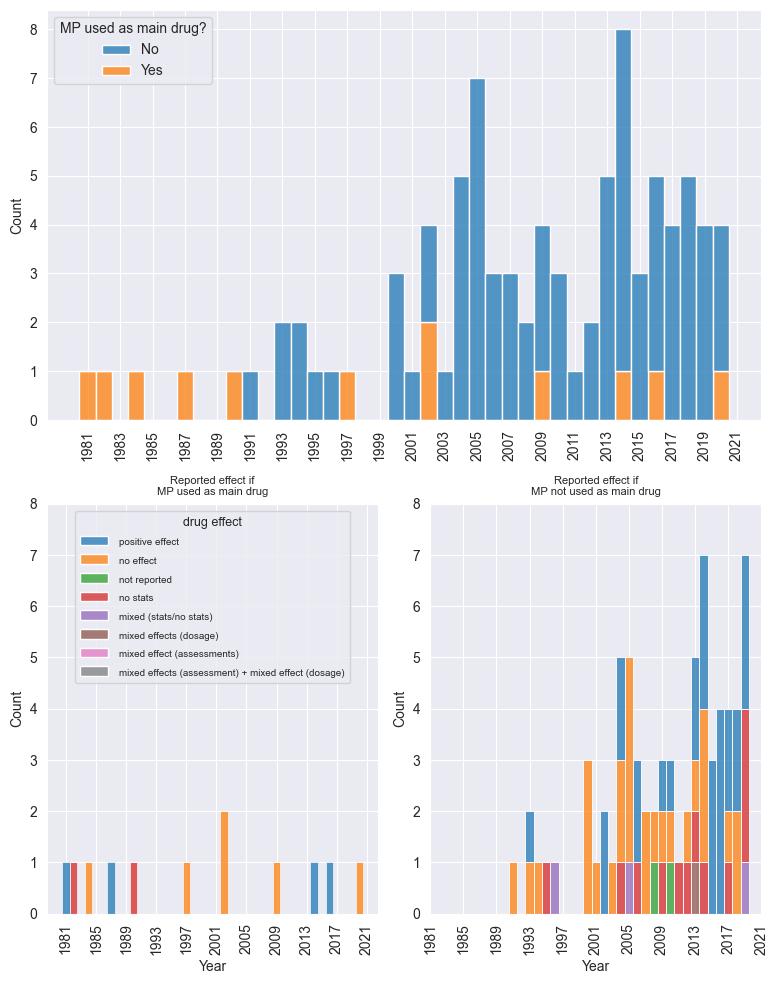

In [6]:
fig   = plt.figure(figsize=(8, 10))
gs    = GridSpec(2, 2, figure=fig)
ax1   = fig.add_subplot(gs[0, :])
ax2_1 = fig.add_subplot(gs[1, 0])
ax2_2 = fig.add_subplot(gs[1, 1])
ax2_1.set_ylim(0,8)
ax2_2.set_ylim(0,8)
fig.subplots_adjust(top=1.5, bottom=1.25)
sns.histplot(
    x="Year", hue="MP used as main drug?", binwidth=1, multiple="stack",
    data=animal_mp_data, ax=ax1
)
ax1.set_xticks(
    np.arange(animal_mp_data["Year"].min(), animal_mp_data["Year"].max() + 1, 2) + 0.5,
    np.arange(animal_mp_data["Year"].min(), animal_mp_data["Year"].max() + 1, 2),
    rotation=90
)
ax1.set_xlabel(None)
sns.histplot(
    x="Year", hue="Drug effect on functional assessment",
    hue_order=["positive effect", "no effect", "not reported", "no stats", "mixed (stats/no stats)", "mixed effects (dosage)", "mixed effect (assessments)", "mixed effects (assessment) + mixed effect (dosage)"],
    binwidth=1, multiple="stack",
    data=animal_mp_data[animal_mp_data["MP used as main drug?"] == "Yes"], ax=ax2_1, legend=True
)
ax2_1.set_xticks(
    np.arange(animal_mp_data["Year"].min(), animal_mp_data["Year"].max() + 1, 4) + 0.5,
    np.arange(animal_mp_data["Year"].min(), animal_mp_data["Year"].max() + 1, 4),
    rotation=90
)
ax2_1.set_title("Reported effect if\nMP used as main drug", fontsize=8)
sns.move_legend(
    ax2_1, "upper center"
)
sns.histplot(
    x="Year", hue="Drug effect on functional assessment",
    hue_order=["positive effect", "no effect", "not reported", "no stats", "mixed (stats/no stats)", "mixed effects (dosage)", "mixed effect (assessments)", "mixed effects (assessment) + mixed effect (dosage)"],
    binwidth=1, multiple="stack",
    data=animal_mp_data[animal_mp_data["MP used as main drug?"] == "No"], ax=ax2_2, legend=False
)
ax2_2.set_xticks(
    np.arange(animal_mp_data["Year"].min(), animal_mp_data["Year"].max() + 1, 4) + 0.5,
    np.arange(animal_mp_data["Year"].min(), animal_mp_data["Year"].max() + 1, 4),
    rotation=90
)
ax2_2.set_title("Reported effect if\nMP not used as main drug", fontsize=8)
de_legend = ax2_1.get_legend()
de_legend.set_title("drug effect")
plt.setp(de_legend.get_title(), fontsize=9)
plt.setp(de_legend.get_texts(), fontsize=7)
fig.tight_layout()
plt.savefig(FIGURE_PATH / "MP_maindrug_effect.png", dpi=100)